## Import Library

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split


pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) #Limiting 4 decimal
plt.rcParams["figure.figsize"] = [9,5]
plt.style.use('ggplot')



## Load & Describe Dataset

In [2]:
data_df = pd.read_csv("../input/forest-fires-data-set/forestfires.csv")

In [3]:
data_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2000,26.2000,94.3000,5.1000,8.2000,51,6.7000,0.0000,0.0000
1,7,4,oct,tue,90.6000,35.4000,669.1000,6.7000,18.0000,33,0.9000,0.0000,0.0000
2,7,4,oct,sat,90.6000,43.7000,686.9000,6.7000,14.6000,33,1.3000,0.0000,0.0000
3,8,6,mar,fri,91.7000,33.3000,77.5000,9.0000,8.3000,97,4.0000,0.2000,0.0000
4,8,6,mar,sun,89.3000,51.3000,102.2000,9.6000,11.4000,99,1.8000,0.0000,0.0000


In [4]:
target = 'area' 

In [5]:
data_df.shape

(517, 13)

In [6]:
data_df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [7]:
data_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [8]:
data_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.0000,517.0000,517.0000,517.0000,517.0000,517.0000,517.0000,517.0000,517.0000,517.0000,517.0000
mean,4.6692,4.2998,90.6447,110.8723,547.9400,9.0217,18.8892,44.2882,4.0176,0.0217,12.8473
std,2.3138,1.2299,5.5201,64.0465,248.0662,4.5595,5.8066,16.3175,1.7917,0.2960,63.6558
min,1.0000,2.0000,18.7000,1.1000,7.9000,0.0000,2.2000,15.0000,0.4000,0.0000,0.0000
25%,3.0000,4.0000,90.2000,68.6000,437.7000,6.5000,15.5000,33.0000,2.7000,0.0000,0.0000
50%,4.0000,4.0000,91.6000,108.3000,664.2000,8.4000,19.3000,42.0000,4.0000,0.0000,0.5200
75%,7.0000,5.0000,92.9000,142.4000,713.9000,10.8000,22.8000,53.0000,4.9000,0.0000,6.5700
max,9.0000,9.0000,96.2000,291.3000,860.6000,56.1000,33.3000,100.0000,9.4000,6.4000,1090.8400


In [9]:
# Calculating missing data in feature columns
data_mis = (data_df.isnull().sum() / len(data_df)) * 100
data_mis = data_mis.drop(data_mis[data_mis == 0].index).sort_values(ascending=False)
data_mis = pd.DataFrame({'Percentage' :data_mis})
data_mis['Id'] = data_mis.index
data_mis.reset_index(drop=True,level=0, inplace=True)
data_mis.head()

,Percentage,Id


In [10]:
dft = data_df.drop(columns=target)
cate_columns = dft.select_dtypes(include='object').columns.tolist()
nume_columns = dft.select_dtypes(exclude='object').columns.tolist()

In [11]:
print('Categorical columns: ',cate_columns)
print('Numerical columns: ',nume_columns)

Categorical columns:  ['month', 'day']
Numerical columns:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


In [12]:
print("Skew: \n{}".format(data_df.skew()))
print("Kurtosis: \n{}".format(data_df.kurtosis()))

Skew: 
X       0.0362
Y       0.4173
FFMC   -6.5756
DMC     0.5475
DC     -1.1004
ISI     2.5363
temp   -0.3312
RH      0.8629
wind    0.5710
rain   19.8163
area   12.8469
dtype: float64
Kurtosis: 
X       -1.1723
Y        1.4206
FFMC    67.0660
DMC      0.2048
DC      -0.2452
ISI     21.4580
temp     0.1362
RH       0.4382
wind     0.0543
rain   421.2960
area   194.1407
dtype: float64


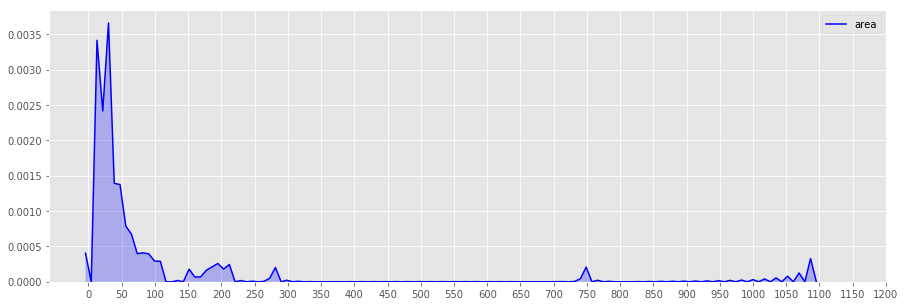

In [13]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data_df[target],shade=True,color='b')
plt.xticks([i for i in range(0,1250,50)])
plt.show()

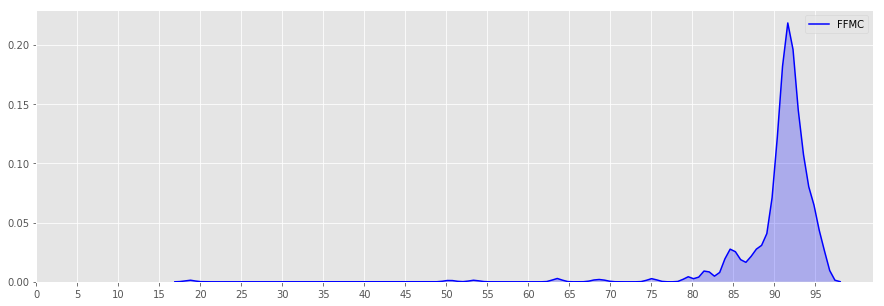

In [14]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data_df['FFMC'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

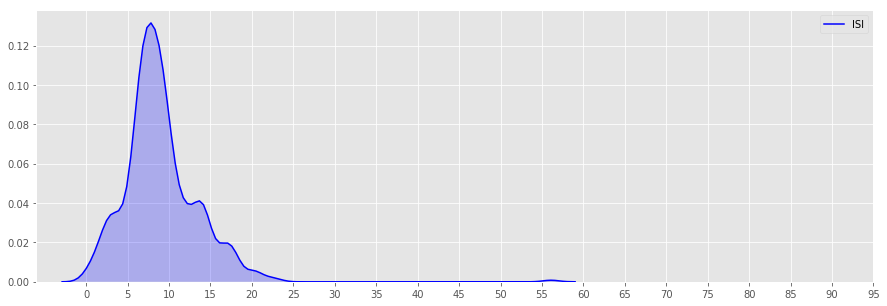

In [15]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(data_df['ISI'],shade=True,color='b')
plt.xticks([i for i in range(0,100,5)])
plt.show()

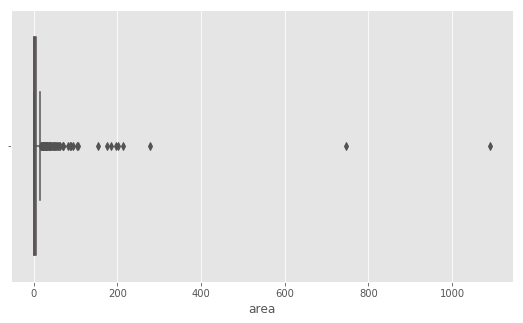

In [16]:
outl_dect = sns.boxplot(data_df[target])

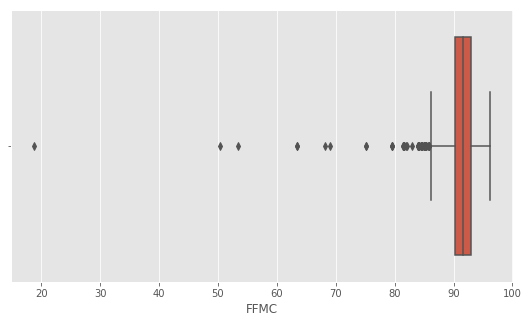

In [17]:
outl_dect = sns.boxplot(data_df['FFMC'])

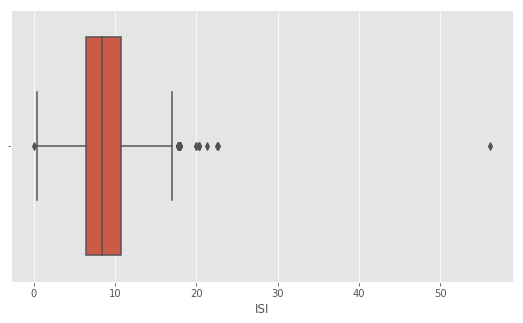

In [18]:
outl_dect = sns.boxplot(data_df['ISI'])

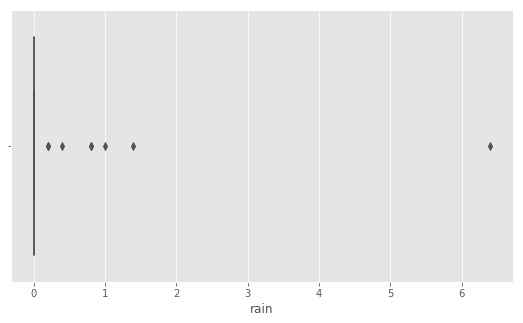

In [19]:
outl_dect = sns.boxplot(data_df['rain'])

In [20]:
outlier_columns = ['area','FFMC','ISI','rain']

In [21]:
np.log1p(data_df[outlier_columns]).skew()

area     1.2178
FFMC   -11.6754
ISI     -0.9372
rain    14.1730
dtype: float64

In [22]:
np.log1p(data_df[outlier_columns]).kurtosis()

area     0.9457
FFMC   185.4824
ISI      2.5846
rain   234.2400
dtype: float64

In [23]:
mask = data_df.loc[:,['FFMC']].apply(zscore).abs() < 3

In [24]:
data_df = data_df[mask.values]
data_df.shape

(510, 13)

In [25]:
# Since most of the values in rain are 0.0, we can convert it as a categorical column
data_df['rain'] = data_df['rain'].apply(lambda x: int(x > 0.0))


In [26]:
outlier_columns.remove('rain')
data_df[outlier_columns] = np.log1p(data_df[outlier_columns])

In [27]:
data_df[outlier_columns].skew()

area    1.2085
FFMC   -1.8040
ISI    -0.4344
dtype: float64

In [28]:
data_df[outlier_columns].kurtosis() 

area   0.9234
FFMC   4.8667
ISI    1.1226
dtype: float64

In [29]:
data_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,4.6804,4.2941,4.5226,111.8376,550.4704,2.2285,18.9516,44.0294,4.0173,0.0157,1.1214
std,2.3205,1.2346,0.0350,63.8537,246.6307,0.4288,5.7899,15.9683,1.7888,0.1244,1.4014
min,1.0000,2.0000,4.3320,3.0000,7.9000,0.7419,2.2000,15.0000,0.4000,0.0000,0.0000
25%,3.0000,4.0000,4.5142,73.2500,442.3000,2.0412,15.6250,32.2500,2.7000,0.0000,0.0000
50%,4.0000,4.0000,4.5288,108.4000,664.2000,2.2407,19.3000,41.5000,4.0000,0.0000,0.4572
75%,7.0000,5.0000,4.5422,142.4000,714.2000,2.4849,22.8000,53.0000,4.9000,0.0000,2.0252
max,9.0000,9.0000,4.5768,291.3000,860.6000,4.0448,33.3000,99.0000,9.4000,1.0000,6.9956


In [30]:
data_sel = data_df.copy()

In [31]:
le = LabelEncoder() 
  
data_sel['day']= le.fit_transform(data_sel['day']) 
data_sel['month']= le.fit_transform(data_sel['month']) 

In [32]:
X, y = data_sel.iloc[:,:-1],data_sel.iloc[:,-1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [34]:
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg = xgb.XGBRegressor(base_score=0.3, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.24, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=102,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)



In [35]:
#eval_set = [(X_test, y_test)]
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, eval_metric=["rmse"],eval_set=eval_set, verbose=False)
preds = xg_reg.predict(X_test)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [36]:
def calc_ISE(X_train, y_train, model):
    '''returns the in-sample R^2 and RMSE; assumes model already fit.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_train, y_train), rmse
    
def calc_OSE(X_test, y_test, model):
    '''returns the out-of-sample R^2 and RMSE; assumes model already fit.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_test, y_test), rmse


In [37]:
is_r2, ise = calc_ISE(X_train, y_train,xg_reg )
os_r2, ose = calc_OSE(X_test, y_test, xg_reg)

# show dataset sizes
data_list = (('R^2_in', is_r2), ('R^2_out', os_r2), 
             ('ISE', ise), ('OSE', ose))
for item in data_list:
    print('{:10}: {}'.format(item[0], item[1]))

R^2_in    : 0.04298652222055299
R^2_out   : -0.015935882283006464
ISE       : 1.3822183772150034
OSE       : 1.3821543637297975


In [38]:
print('train/test: ',ose/ise)

train/test:  0.9999536878641891


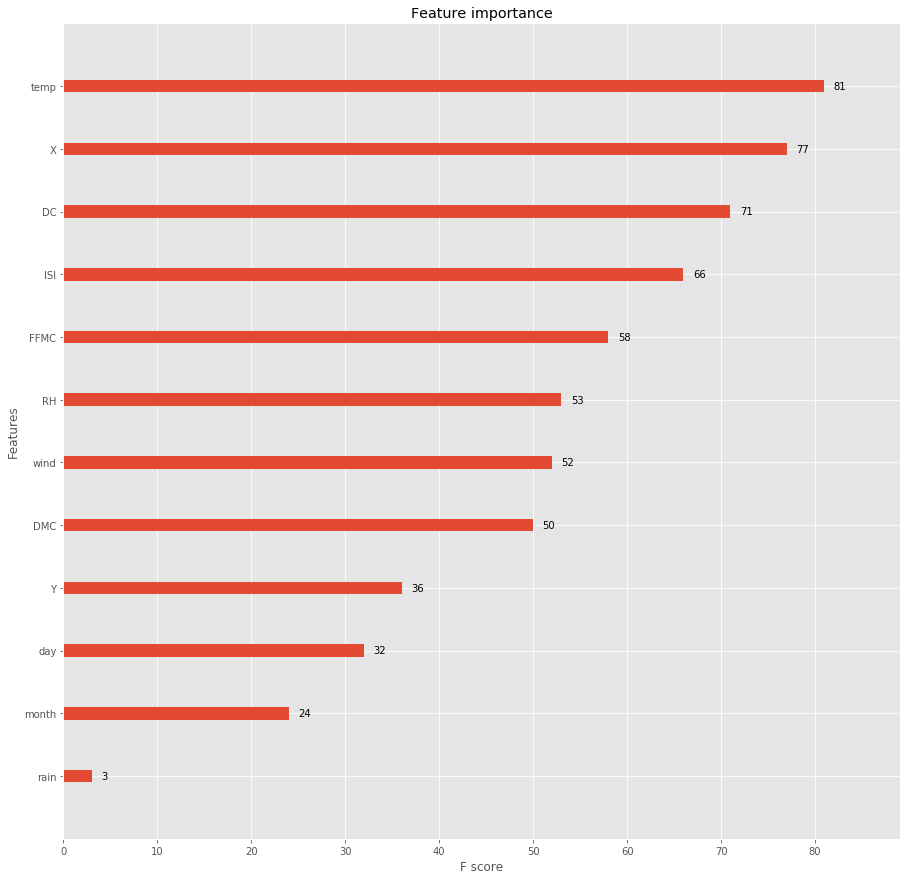

In [41]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()


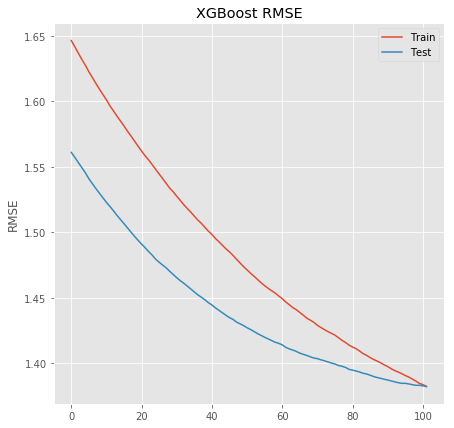

In [42]:
# retrieve performance metrics
results = xg_reg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot RMSE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()